### Additional steps

In [2]:
from pathlib import Path
import pandas as pd
import gc
from sklearn.preprocessing import LabelEncoder
import pickle
import bz2
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
data_path = Path('./data/').resolve()
!ls {data_path}

In [ ]:
with bz2.open(data_path / '09_prepared.pkl.bz2', 'rb') as f:
    df = pickle.load(f)
df[df.id_card_int == 883386]

In [ ]:
df[df.id_card_int == 883386]

In [ ]:
with bz2.open(data_path / '10_prepared.pkl.bz2', 'rb') as f1:
    df10 = pickle.load(f1)
df10.head()

In [ ]:
with bz2.open(data_path / '11_prepared.pkl.bz2', 'rb') as f:
    df11 = pickle.load(f)
df11.head()

In [ ]:
df.drop(['id_card', 'id_doc'], axis=1, inplace=True)
df.head()

In [ ]:
with bz2.open(data_path / '09_stats.pkl.bz2', 'wb') as f:
    pickle.dump(df, f, protocol=4)

### Statistics

In [4]:
from pathlib import Path
import pandas as pd
import gc
from sklearn.preprocessing import LabelEncoder
import pickle
import bz2

data_path = Path('./data/').resolve()
!ls {data_path}

09_prepared.pkl.bz2 09_stats.pkl.bz2    10_prepared.pkl.bz2 11_prepared.pkl.bz2


In [13]:
with bz2.open(data_path / '09_prepared.pkl.bz2', 'rb') as f:
    df9 = pickle.load(f)
df9.head()

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
0,2020-09-01 17:01:25,0E05D308-5CEC-EA11-B444-005056A7539A,0,8594499,52,271,1.0,108.00,False,1538855,1283228
1,2020-09-01 17:35:36,610205A1-61EC-EA11-B444-005056A7539A,0,1452388,52,271,1.0,108.00,False,267307,8873113
2,2020-09-01 19:19:21,8AF19602-70EC-EA11-B444-005056A7539A,0,3493538,52,271,1.0,107.95,False,610220,12712899
3,2020-09-01 21:53:34,EB6C71A3-84EC-EA11-B444-005056A7539A,0,2491281,52,271,1.0,108.00,False,441497,21535283
4,2020-09-01 18:42:31,0706023F-6BEC-EA11-B444-005056A7539A,0,5732396,61,97,2.0,88.00,False,1065358,642341


In [7]:
with bz2.open(data_path / '10_prepared.pkl.bz2', 'rb') as f2:
    df10 = pickle.load(f2)
df10.head()

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
0,2020-10-01 20:22:55,16427403-0C04-EB11-B444-005056A7539A,0,9462341,52,339,1.0,107.90,False,1636749,2035558
1,2020-10-01 20:54:12,8E81258D-0F04-EB11-B444-005056A7539A,0,1452208,52,339,1.0,80.04,False,267261,13037327
2,2020-10-01 21:25:59,0FA47FAC-1304-EB11-B444-005056A7539A,0,7183110,61,379,1.0,31.92,True,1331395,1430590
3,2020-10-01 13:31:01,265086E0-D103-EB11-B444-005056A7539A,0,3659782,61,97,1.0,55.98,False,641525,3504660
4,2020-10-01 16:32:06,787F8164-EB03-EB11-B444-005056A7539A,0,7153315,61,97,4.0,176.00,False,1325852,11024438


In [6]:
with bz2.open(data_path / '11_prepared.pkl.bz2', 'rb') as f2:
    df11 = pickle.load(f2)
df11.head()

,date,id_doc,id_order,id_card,id_tov,id_kontr,quantity,sum,is_green,id_card_int,id_doc_int
0,2020-11-01 15:29:01,2220AF19-3E1C-EB11-B444-005056A7539A,0,1826606,52,271,1.0,107.98,False,332351,3121751
1,2020-11-01 12:41:10,F102DC7D-261C-EB11-B444-005056A7539A,8293317,C560312,52,-9999,1.0,108.00,False,1875438,22047017
2,2020-11-01 13:17:09,4632D419-2C1C-EB11-B444-005056A7539A,0,3225041,61,379,2.0,112.00,False,563112,6419825
3,2020-11-01 12:31:31,706B9E66-251C-EB11-B444-005056A7539A,0,B700679,61,379,1.0,55.91,False,1841710,10284541
4,2020-11-01 13:06:15,71F3E090-2A1C-EB11-B444-005056A7539A,0,7024046,61,271,2.0,87.80,False,1304277,10424967


In [7]:
df9.groupby('id_card_int').size().reset_index(name='counts').sort_values('counts',ascending=False)

,id_card_int,counts
652503,883386,189812
426570,568930,753
910003,1243870,707
389897,518424,694
163425,213588,675
...,...,...
838138,1143103,1
134510,175664,1
399782,532101,1
134507,175661,1


<AxesSubplot:>

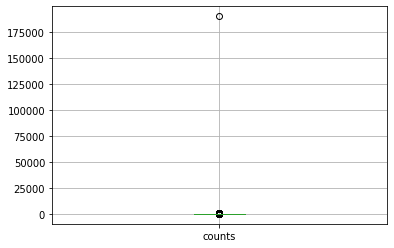

In [8]:
pd.DataFrame(df9.groupby('id_card_int').size().reset_index(name='counts').sort_values('counts',ascending=False)['counts']).boxplot()

In [9]:
cdf9 = df9.copy()

In [10]:
cdf9 = cdf9.drop(cdf9[cdf9.id_card_int == 883386].index)

In [11]:
pd.DataFrame(cdf9.groupby('id_card_int').size().reset_index(name='counts').sort_values('counts',ascending=False)['counts']).median()

counts    14.0
dtype: float64

In [12]:
pd.DataFrame(cdf9.groupby('id_card_int').size().reset_index(name='counts').sort_values('counts',ascending=False)['counts']).mean()

counts    30.860332
dtype: float64

<AxesSubplot:>

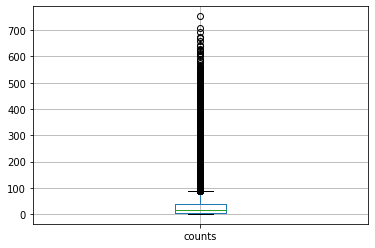

In [13]:
# Since the median and mean are low, we can consider high values as outliers, but we are not sure since it can be corporative card and some customer== company, and it is hard to find the border
pd.DataFrame(cdf9.groupby('id_card_int').size().reset_index(name='counts').sort_values('counts',ascending=False)['counts']).boxplot()

In [14]:
dsum9 = pd.DataFrame(df9.groupby('id_card_int')['sum'].sum().reset_index(name='sum').sort_values('sum',ascending=False))
dsum9[(0>=dsum9['sum']) | (dsum9['sum']>1000000)]

,id_card_int,sum
652503,883386,18259091.85
1301978,1820267,0.00
396386,527413,0.00
1320529,1850061,0.00
1331995,1866912,0.00
277094,365257,0.00
1316281,1843017,0.00
306743,405371,0.00
1239043,1720481,0.00
16,18,0.00


In [11]:
dsum10 = pd.DataFrame(df10.groupby('id_card_int')['sum'].sum().reset_index(name='sum').sort_values('sum',ascending=False))
dsum10[(0>=dsum10['sum']) | (dsum10['sum']>1000000)]

,id_card_int,sum
649740,883386,19738782.89
1332874,1880405,0.00
1305760,1838463,0.00
885503,1216001,0.00
1331740,1878783,0.00
1271257,1784040,0.00
1195411,1666204,0.00
1252266,1753721,0.00
1210949,1690045,0.00
703093,958246,0.00


In [12]:
dsum11 = pd.DataFrame(df11.groupby('id_card_int')['sum'].sum().reset_index(name='sum').sort_values('sum',ascending=False))
dsum11[(0>=dsum11['sum']) | (dsum11['sum']>1000000)]

,id_card_int,sum
634961,883386,22018356.77
1105409,1577248,1279932.55
1003084,1422266,0.00
773558,1084788,0.00
1258375,1819705,0.00
725167,1013965,0.00
1322588,1922207,0.00
1194651,1715658,0.00
887168,1250762,0.00
1331214,1939924,0.00
